In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = []
results_june = session.query(Measurement.date, Measurement.tobs)

In [5]:
#  3. Convert the June temperatures to a list.
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6 ).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results_june, columns=['date','temperature'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
pd.set_option('display.max_rows', None)
print(df)

                  date  temperature
date                               
2010-06-01  2010-06-01         78.0
2010-06-01  2010-06-01         73.0
2010-06-01  2010-06-01         77.0
2010-06-01  2010-06-01         69.0
2010-06-01  2010-06-01         76.0
2010-06-01  2010-06-01         71.0
2010-06-01  2010-06-01         74.0
2010-06-01  2010-06-01         70.0
2010-06-01  2010-06-01         74.0
2010-06-02  2010-06-02         78.0
2010-06-02  2010-06-02         70.0
2010-06-02  2010-06-02         76.0
2010-06-02  2010-06-02         76.0
2010-06-02  2010-06-02         71.0
2010-06-02  2010-06-02         76.0
2010-06-02  2010-06-02         76.0
2010-06-02  2010-06-02         72.0
2010-06-02  2010-06-02         76.0
2010-06-03  2010-06-03         74.0
2010-06-03  2010-06-03         78.0
2010-06-03  2010-06-03         73.0
2010-06-03  2010-06-03         72.0
2010-06-03  2010-06-03         77.0
2010-06-03  2010-06-03         76.0
2010-06-03  2010-06-03         75.0
2010-06-03  2010-06-03      

In [7]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:xlabel='date'>

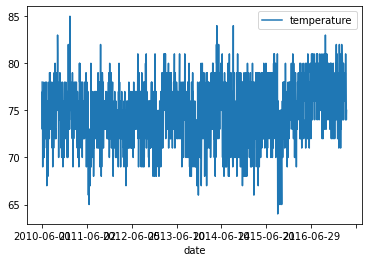

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.plot()

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = []
# session that we created earlier so that we can query our database
results_dec = session.query(Measurement.date, Measurement.tobs)

In [10]:
# 7. Convert the December temperatures to a list.
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12 ).all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results_dec, columns=['date','temperature'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()

<AxesSubplot:xlabel='date'>

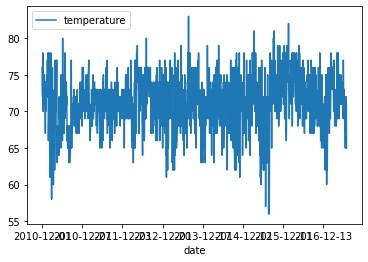

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.plot()

In [13]:
df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
